In [1]:
%load_ext lab_black

In [ ]:
from traffic.data import flightradar24
from traffic_flightradar24.flightradar24 import FlightList

In [ ]:
l = flightradar24.list_number('UA89')
l = FlightList(flightradar24, list(elt for elt in l.json if elt['identification']['id'] is not None))

In [ ]:
from tqdm.autonotebook import tqdm

t = sum(f for f in tqdm(l))

In [ ]:
t.to_parquet("ua89_history.parquet")

In [2]:
from traffic.core import Traffic

t = Traffic.from_file("ua89_history.parquet")

/Users/xo/Library/miniconda3/envs/python38/lib/python3.8/site-packages/pkg_resources/__init__.py:1150: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  return get_provider(package_or_requirement).get_resource_stream(
/Users/xo/Library/miniconda3/envs/python38/lib/python3.8/site-packages/ipyleaflet/leaflet.py:317: DeprecationWarning: metadata {'dtype': None} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  data = Dataset().tag(dtype=None, sync=True, to_json=ds_x_to_json)


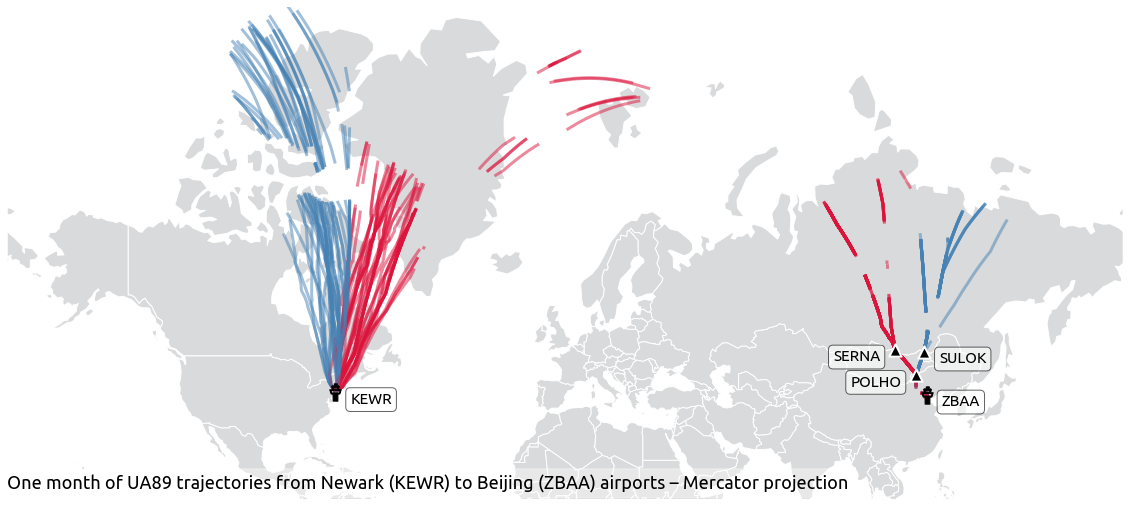

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from traffic.core.projection import Mercator, Orthographic, Robinson, PlateCarree
from traffic.data import airports
from traffic.drawing import countries
from traffic.drawing.markers import atc_tower

text_style = dict(
    verticalalignment="top",
    horizontalalignment="right",
    fontname="Ubuntu",
    fontsize=15,
    bbox=dict(facecolor="white", alpha=0.6, boxstyle="round"),
)


with plt.style.context("traffic"):
    fig, ax = plt.subplots(figsize=(20, 15), subplot_kw=dict(projection=Mercator()))

    ax.add_feature(
        countries(
            scale="110m", edgecolor="white", facecolor="#d9dadb", alpha=1, linewidth=1
        )
    )

    for flight in t:
        for chunk in flight.split():
            chunk.plot(
                ax,
                color="steelblue"
                if flight.min("longitude") < airports["KEWR"].longitude - 4
                else "crimson",
                alpha=0.5,
                lw=3,
            )

    airports["KEWR"].point.plot(
        ax,
        shift=dict(units="dots", x=15),
        marker=atc_tower,
        s=300,
        zorder=5,
        text_kw={**text_style, "horizontalalignment": "left",},
    )

    airports["ZBAA"].point.plot(
        ax,
        shift=dict(units="dots", x=15),
        marker=atc_tower,
        s=300,
        zorder=5,
        text_kw={**text_style, "horizontalalignment": "left",},
    )

    from traffic.data import navaids

    navaids["POLHO"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=-15),
        text_kw={**text_style, "horizontalalignment": "right",},
        zorder=5,
    )

    navaids["SERNA"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=-15),
        text_kw={**text_style, "horizontalalignment": "right",},
        zorder=5,
    )

    navaids["SULOK"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=15),
        text_kw={**text_style, "horizontalalignment": "left",},
        zorder=5,
    )

    ax.text(
        -180,
        12,
        "One month of UA89 trajectories from Newark (KEWR) to Beijing (ZBAA) airports – Mercator projection",
        transform=PlateCarree(),
        verticalalignment="bottom",
        horizontalalignment="left",
        fontname="Ubuntu",
        fontsize=18,
        bbox=dict(facecolor="white", edgecolor="white", alpha=0.4, boxstyle="round"),
    )

    ax.set_extent((-180, 180, 10, 90))
    # ax.set_global()
    ax.outline_patch.set_visible(False)
    ax.background_patch.set_visible(False)

    fig.savefig("ua89_mercator.png")

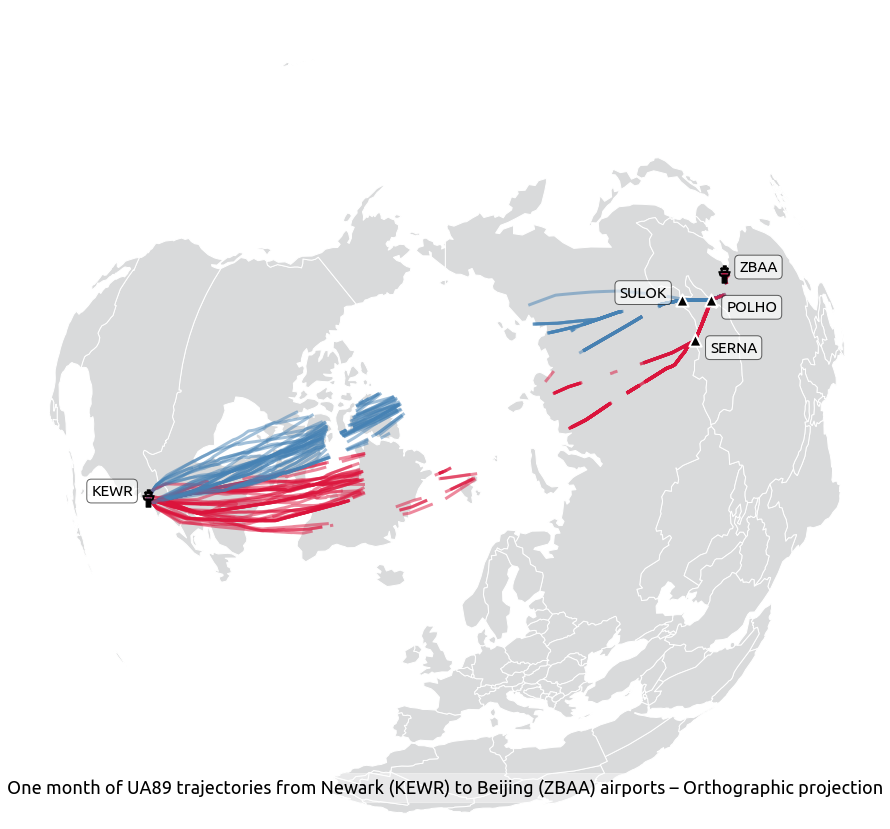

In [5]:
text_style = dict(
    verticalalignment="bottom",
    horizontalalignment="right",
    fontname="Ubuntu",
    fontsize=15,
    bbox=dict(facecolor="white", alpha=0.6, boxstyle="round"),
)


with plt.style.context("traffic"):
    fig, ax = plt.subplots(
        figsize=(15, 15), subplot_kw=dict(projection=Orthographic(0, 90))
    )

    ax.add_feature(
        countries(
            scale="110m", edgecolor="white", facecolor="#d9dadb", alpha=1, linewidth=1
        )
    )

    for flight in t:
        for chunk in flight.split():
            chunk.plot(
                ax,
                color="steelblue"
                if flight.min("longitude") < airports["KEWR"].longitude - 4
                else "crimson",
                alpha=0.5,
                lw=3,
            )

    airports["KEWR"].point.plot(
        ax,
        shift=dict(units="dots", x=-15),
        marker=atc_tower,
        s=300,
        zorder=5,
        text_kw={**text_style, "horizontalalignment": "right",},
    )

    airports["ZBAA"].point.plot(
        ax,
        shift=dict(units="dots", x=15),
        marker=atc_tower,
        s=300,
        zorder=5,
        text_kw={**text_style, "horizontalalignment": "left",},
    )

    from traffic.data import navaids

    navaids["POLHO"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=15),
        text_kw={
            **text_style,
            "verticalalignment": "top",
            "horizontalalignment": "left",
        },
        zorder=5,
    )

    navaids["SERNA"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=15),
        text_kw={
            **text_style,
            "verticalalignment": "top",
            "horizontalalignment": "left",
        },
        zorder=5,
    )

    navaids["SULOK"].plot(
        ax,
        marker="^",
        s=150,
        edgecolor="white",
        lw=2,
        shift=dict(units="dots", x=-15),
        text_kw={
            **text_style,
            "verticalalignment": "bottom",
            "horizontalalignment": "right",
        },
        zorder=5,
    )

    ax.text(
        0,
        20,
        "One month of UA89 trajectories from Newark (KEWR) to Beijing (ZBAA) airports – Orthographic projection",
        transform=PlateCarree(),
        verticalalignment="bottom",
        horizontalalignment="center",
        fontname="Ubuntu",
        fontsize=18,
        bbox=dict(facecolor="white", edgecolor="white", alpha=0.4, boxstyle="round"),
    )

    # ax.set_extent((-180, 180, 10, 90))
    ax.set_global()
    ax.outline_patch.set_visible(False)
    ax.background_patch.set_visible(False)

    fig.savefig("ua89_orthographic.png")

In [9]:
airports["KEWR"].longitude + airports["ZBAA"].longitude

42.424133